In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
data = pd.read_csv("data_stocks.csv")

In [10]:
data.head(10)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [12]:
data = data.drop(columns=['DATE'])

In [14]:
# checking missing values
data.isnull().sum()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 501, dtype: int64

In [16]:
# filling missing values 
data.fillna(data.mean(), inplace=True)

In [18]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [20]:
data_scaled_df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-1.464426,-1.650134,-1.086073,-1.689824,1.296396,-0.282628,-1.893421,1.834067,-0.129860,-1.756952,...,-2.507925,1.347687,-1.501169,-1.845414,0.676495,-1.021763,-1.225651,-1.955784,0.102815,-2.041884
1,-1.452038,-1.640930,-1.082866,-1.590065,1.316393,-0.302970,-1.847626,1.850617,-0.133415,-1.748783,...,-2.507925,1.347687,-1.693422,-1.845414,0.676495,-1.020051,-1.225651,-1.985500,0.061795,-2.041884
2,-1.487941,-1.656271,-1.084454,-1.603800,1.291396,-0.286583,-1.862536,1.841308,-0.093421,-1.789624,...,-2.468197,1.368901,-1.706681,-1.787088,0.671063,-1.021763,-1.254010,-1.983023,0.049311,-2.037402
3,-1.446730,-1.637862,-1.092487,-1.625790,1.276398,-0.302970,-1.864964,1.805105,-0.136969,-1.818212,...,-2.491295,1.368901,-1.600610,-1.781256,0.671063,-1.022618,-1.242667,-1.950831,0.049311,-2.032921
4,-1.433078,-1.586379,-1.089280,-1.653679,1.293896,-0.321053,-1.842291,1.805105,-0.122750,-1.781456,...,-2.489447,1.401899,-1.693422,-1.798753,0.676495,-1.021763,-1.231323,-1.943402,0.048419,-2.074751


<h1>Problem 1: Analyzing Stock Performance Similarity</h1>

In [23]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

In [25]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

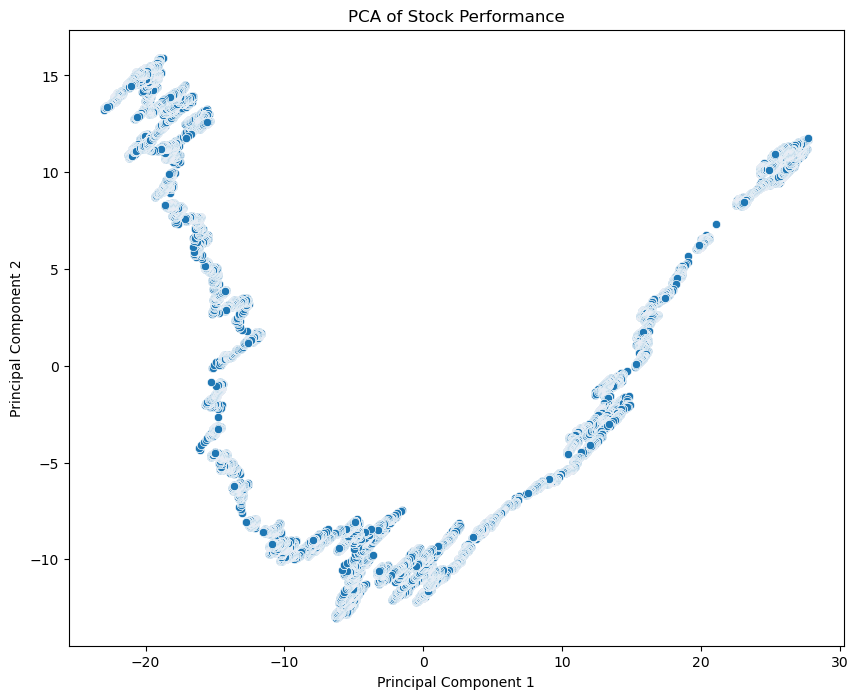

In [27]:
# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Stock Performance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<h1>Problem 2: Identifying Unique Patterns in Stock Data</h1>

In [30]:
# identify unique patterns
kmeans = KMeans(n_clusters=5, random_state=0) 
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled)

In [32]:
# number of unique patterns
unique_patterns = data_scaled_df['Cluster'].nunique()
print("Number of unique patterns: ", unique_patterns)

Number of unique patterns:  5


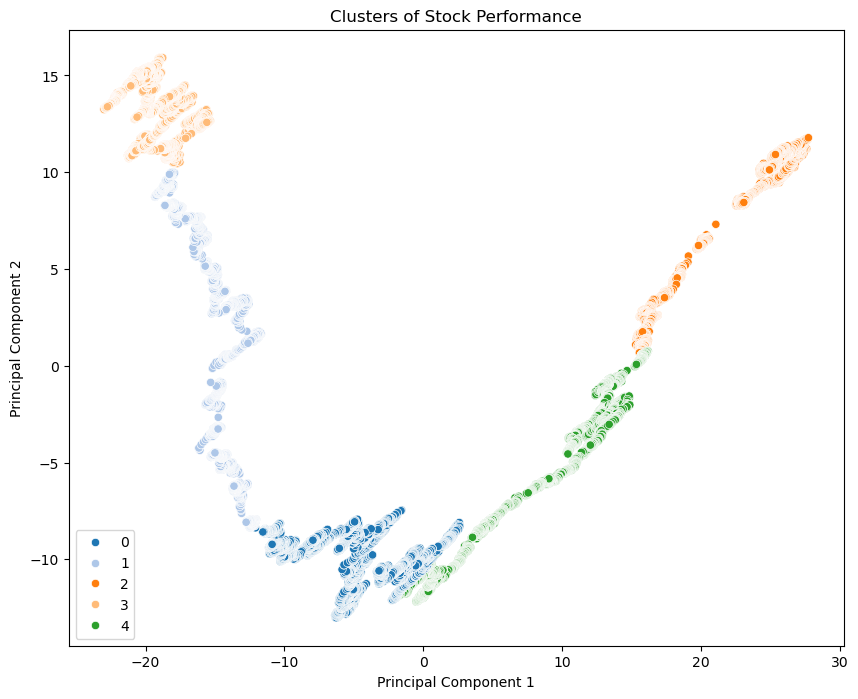

In [34]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=data_scaled_df['Cluster'], palette='tab20')
plt.title('Clusters of Stock Performance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

<h1>Problem 3: Identifying Stocks Moving Together and Differently </h1>

In [41]:
# Perform hierarchical clustering
linked = linkage(data_scaled.T, method='ward')

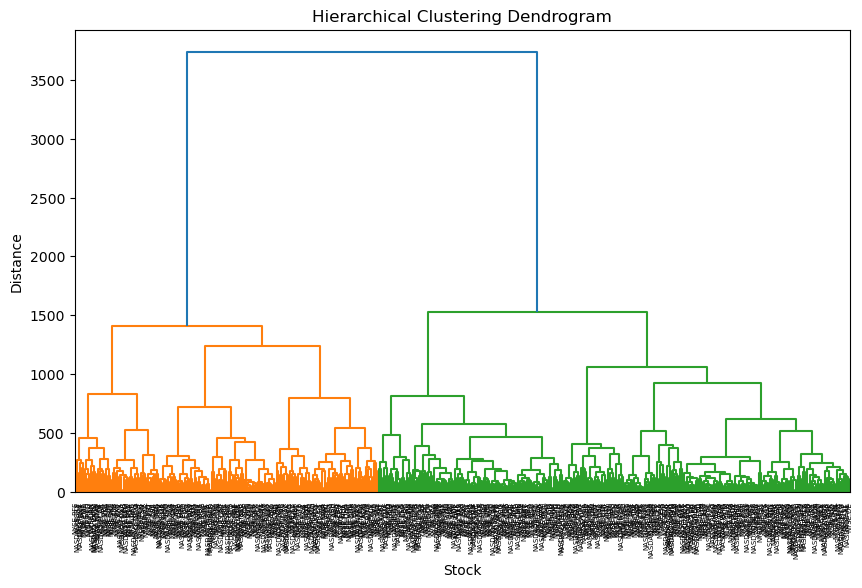

In [45]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=data.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stock')
plt.ylabel('Distance')
plt.show()